# A Cando-app to setup free energy perturbation calculations using AMBER

In [2]:
(start-swank)

Swank is already running


NIL

First we do the following:

  * Load the FEP package.
  * Set things up to carry out geometry optimization using Amber.

In [3]:
*default-pathname-defaults*

#P"/Users/meister/Development/cando/src/lisp/modules/quicklisp/local-projects/fep/examples/lysozyme/"

In [4]:
(ql:quickload :fep)

To load "fep":
  Load 1 ASDF system:
    fep

; Loading "fep"
......   build-fasl seconds real(4.5) run(4.5) llvm(0) link(4.4) (llvm+link)/real(97%)
..   build-fasl seconds real(0.9) run(0.9) llvm(0) link(0.9) (llvm+link)/real(97%)



(:FEP)

In [5]:
(setup-default-paths)

(#P"/Users/meister/Development/cando/src/lisp/modules/quicklisp/local-projects/fep/examples/lysozyme/"
 #P"/Users/meister/Development/amber18/dat/antechamber/"
 #P"/Users/meister/Development/amber18/dat/leap/cmd/"
 #P"/Users/meister/Development/amber18/dat/leap/parm/"
 #P"/Users/meister/Development/amber18/dat/leap/lib/"
 #P"/Users/meister/Development/amber18/dat/leap/prep/")

In [6]:
(load-atom-type-rules "ATOMTYPE_GFF.DEF")

(#<FORCE-FIELD ATOMTYPE_GFF.DEF>)

In [7]:
(source "leaprc.ff14SB.redq")


add-atom-types doesn't do anything

Warning!  Skipping 10-12 hbond


Warning!  Skipping force field atom equivalences



T

In [8]:
(source "leaprc.gaff")


add-atom-types doesn't do anything

Warning!  Skipping 10-12 hbond


Warning!  Skipping force field atom equivalences



T

In [9]:
(list-force-fields)

((:DEFAULT #<FORCE-FIELD gaff.dat> #<FORCE-FIELD frcmod.ff14SB>
  #<FORCE-FIELD parm10.dat> #<FORCE-FIELD ATOMTYPE_GFF.DEF>))

# Start a new FEP calculation

In [10]:
(:= *feps* (make-instance 'fep::fep-calculation))

*FEPS*

# Import sketch - use Chemdraw

## Open chemdraw and add more functional groups if you want

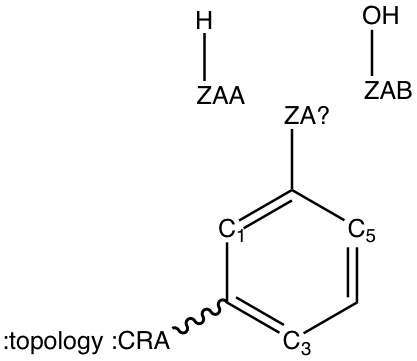

In [11]:
(png-from-file "ligands.png" )

In [12]:
(:= *sk* (handler-bind ((warning #'muffle-warning))
             (with-open-file (fin (open "ligands.cdxml" :direction :input))
             (chem:make-chem-draw fin :add-hydrogens nil))))

ChemDraw_O::parse starting
ChemDraw_O::parse child of page with name(fragment)
CDFragment - starting
CDNode id(337) color(3) label(C_337)
CDNode id(339) color(3) label(C1)
CDNode id(341) color(3) label(C_341)
CDNode id(343) color(3) label(C3)
CDNode id(345) color(3) label(C_345)
CDNode id(347) color(3) label(C5)
CDNode id(363) color(3) label(ZA?)
CDNode id(365) color(3) label(:topology :CRA)
CDBond _IdBegin(337) _IdEnd(339) order(2) display()
CDBond _IdBegin(339) _IdEnd(341) order(1) display()
CDBond _IdBegin(341) _IdEnd(343) order(2) display()
CDBond _IdBegin(343) _IdEnd(345) order(1) display()
CDBond _IdBegin(345) _IdEnd(347) order(2) display()
CDBond _IdBegin(347) _IdEnd(337) order(1) display()
CDBond _IdBegin(337) _IdEnd(363) order(1) display()
CDBond _IdBegin(341) _IdEnd(365) order(1) display(Wavy)
CDFragment - done.
Adding molecule property :TOPOLOGY value: :CRA
ChemDraw_O::parse child of page with name(fragment)
CDFragment - starting
CDNode id(355) color(3) label(H)
CDNode id(35

*SK*

In [13]:
(fep:setup-ligands *feps* *sk*)

Average bond length: 29.99970501898104d0
In build-topologys core-group: (#<ATOM :C1/:C> #<ATOM :C_337/:C> #<ATOM :C_341/:C> #<ATOM :C5/:C>
 #<ATOM :ZA?/:NE> #<ATOM :C3/:C> #<ATOM :C_345/:C>)
side-chain-groups: #<HASH-TABLE-EQL :HashTableCount 2 :calculated-entries 2 :size 16 @0x12b3fceb8> 
map-names-numbers: #<HASH-TABLE-EQL :HashTableCount 0 :calculated-entries 0 :size 16 @0x12b3fcfa8> 
Hydrogens built 100.0% elapsed: -- ETC: --   
Hydrogens built 100.0% elapsed: -- ETC: --   


(#<FEP-STRUCTURE AA> #<FEP-STRUCTURE AB>)

In [14]:
(:= *v* (show (fep:layout-ligands *feps*))) *v*

#<NGLV:NGLWIDGET>

In [15]:
(:= *tests* (list (cons :c1 (lambda (a) (eq (chem:get-name a) :c1)))
                  (cons :c3 (lambda (a) (eq (chem:get-name a) :c3)))
                  (cons :c5 (lambda (a) (eq (chem:get-name a) :c5)))))
(:= *pick* (chem:compile-smarts 
             "[C:6]1~[C<c1>:1]~[C:2]~[C<c3>:3]~[C:4]~[C<c5>:5]1" :tests *tests*))

*PICK*

In [16]:
(show (fep:molecule (find-if (lambda (x) (eq (fep:name x) :AA)) (fep:ligands *feps*))))

#<NGLV:NGLWIDGET>

# Load the lysozyme PDB file

In [17]:
(:= *lysozyme* (load-pdb "181L_mod.pdb"))


Creating molecule with name: A




There are 1 unbuilt heavy atoms - not building hydrogens


*LYSOZYME*

In [18]:
(cando:build-unbuilt-hydrogens *lysozyme*)

Building from sorted-built: (#<ATOM :C/:C> #<ATOM :CB/:C> #<ATOM :N/:N>)
Hydrogens built   0.0% elapsed: -- ETC: --   Building from sorted-built: (#<ATOM :C/:C> #<ATOM :CB/:C> #<ATOM :N/:N>)
Hydrogens built   1.0% elapsed: -- ETC: --   Building from sorted-built: (#<ATOM :C/:C> #<ATOM :CB/:C> #<ATOM :N/:N>)
Building from sorted-built: (#<ATOM :CA/:C> #<ATOM :CG1/:C> #<ATOM :CG2/:C>)
Hydrogens built   2.0% elapsed: -- ETC: --   Building from sorted-built: (#<ATOM :C/:C> #<ATOM :CB/:C> #<ATOM :N/:N>)
Building from sorted-built: (#<ATOM :C/:C> #<ATOM :CB/:C> #<ATOM :N/:N>)
Hydrogens built   3.0% elapsed: -- ETC: --   Building from sorted-built: (#<ATOM :C/:C> #<ATOM :CB/:C> #<ATOM :N/:N>)
Hydrogens built   4.0% elapsed: -- ETC: --   Building from sorted-built: (#<ATOM :C/:C> #<ATOM :CB/:C> #<ATOM :N/:N>)
Building from sorted-built: (#<ATOM :CB/:C> #<ATOM :CD1/:C> #<ATOM :CD2/:C>)
Building from sorted-built: (#<ATOM :C/:C> #<ATOM :CB/:C> #<ATOM :N/:N>)
Hydrogens built   5.0% elapsed: -- ET

1313

In [19]:
(simple-build-unbuilt-atoms *lysozyme*)

NIL

In [20]:
(:= *v* (show *lysozyme*)) *v*

#<NGLV:NGLWIDGET>

In [21]:
(nglv::add-representation *v* "ball+stick" :selection "all")

T

In [22]:
(simple-build-unbuilt-atoms *lysozyme*)

NIL

In [23]:
*lysozyme*

#<AGGREGATE :181L_mod>

In [24]:
(pushnew *lysozyme* (fep:receptors *feps*))

(#<AGGREGATE :181L_mod>)

# Load the ligands

In [25]:
*default-pathname-defaults*

#P"/Users/meister/Development/cando/src/lisp/modules/quicklisp/local-projects/fep/examples/lysozyme/"

In [26]:
(load-off "phen.lib")
(load-off "benz.lib")

(:BNZ)

In [27]:
(:= *ligs* (load-pdb "bnz_phn.pdb"))


Creating molecule with name: A
Creating molecule with name: A




There are 1 unbuilt heavy atoms - not building hydrogens


*LIGS*

In [28]:
(simple-build-unbuilt-atoms *ligs*)
(build-unbuilt-hydrogens *ligs*)

Hydrogens built 100.0% elapsed: -- ETC: --   


12

In [29]:
(show *ligs*)

#<NGLV:NGLWIDGET>

## Print the fixed atoms of the template ligand

In [30]:
(alexandria:hash-table-alist (fep:pattern-atoms *pick* *ligs*))

((2 . #<ATOM :C2/:C>) (6 . #<ATOM :C6/:C>) (3 . #<ATOM :C3/:C>)
 (5 . #<ATOM :C5/:C>) (4 . #<ATOM :C4/:C>) (1 . #<ATOM :C1/:C>))

# Use the GAFF force field to build chemically reasonable structures of candidate ligands

In [31]:
(fep:build-ligands *feps*)

Building AA
build-structures fep: #<FEP-STRUCTURE AA>   map-atoms: NIL
Building AB
build-structures fep: #<FEP-STRUCTURE AB>   map-atoms: NIL


NIL

In [32]:
(mapcar #'fep:molecule (fep:ligands *feps*))

(#<MOLECULE :AA> #<MOLECULE :AB>)

In [33]:
(show (fep:layout-ligands *feps* :accessor 'fep::molecule))

#<NGLV:NGLWIDGET>

# Pose the new ligands onto the template ligand

In [34]:
(fep::pose-ligands-using-pattern *feps* *pick* *ligs*)

fep #<FEP-STRUCTURE AA>
 moveable-atoms -> #<FEP-STRUCTURE AA>
    fixed-atoms -> (#<ATOM :C2/:C> #<ATOM :C6/:C> #<ATOM :C3/:C> #<ATOM :C5/:C> #<ATOM :C4/:C>
 #<ATOM :C1/:C>)
Anchored #<ATOM :C_341/:C> to '( 26.395 5.074 3.499) restraints: (#<RESTRAINT-ANCHOR >) props: (:CHEMDRAW-COLOR 3)
Anchored #<ATOM :C_337/:C> to '( 26.498 6.379 5.469) restraints: (#<RESTRAINT-ANCHOR >) props: (:ATTACH :ZA :CHEMDRAW-COLOR 3)
Anchored #<ATOM :C3/:C> to '( 27.34 5.86 2.902) restraints: (#<RESTRAINT-ANCHOR >) props: (:CHEMDRAW-COLOR 3)
Anchored #<ATOM :C5/:C> to '( 27.42 7.196 4.856) restraints: (#<RESTRAINT-ANCHOR >) props: (:CHEMDRAW-COLOR 3)
Anchored #<ATOM :C_345/:C> to '( 27.837 6.921 3.569) restraints: (#<RESTRAINT-ANCHOR >) props: (:CHEMDRAW-COLOR 3)
Anchored #<ATOM :C1/:C> to '( 25.978 5.327 4.779) restraints: (#<RESTRAINT-ANCHOR >) props: (:CHEMDRAW-COLOR 3)
fep #<FEP-STRUCTURE AB>
 moveable-atoms -> #<FEP-STRUCTURE AB>
    fixed-atoms -> (#<ATOM :C2/:C> #<ATOM :C6/:C> #<ATOM :C3/:C> #<ATOM 


Use the chem::*current-rings* special variable - if this->_IntArg == 0 it means any ring?????

Use the chem::*current-rings* special variable - if this->_IntArg == 0 it means any ring?????

Use the chem::*current-rings* special variable - if this->_IntArg == 0 it means any ring?????

Use the chem::*current-rings* special variable - if this->_IntArg == 0 it means any ring?????

Use the chem::*current-rings* special variable - if this->_IntArg == 0 it means any ring?????

Use the chem::*current-rings* special variable - if this->_IntArg == 0 it means any ring?????

Use the chem::*current-rings* special variable - if this->_IntArg == 0 it means any ring?????

Use the chem::*current-rings* special variable - if this->_IntArg == 0 it means any ring?????

Use the chem::*current-rings* special variable - if this->_IntArg == 0 it means any ring?????

Use the chem::*current-rings* special variable - if this->_IntArg == 0 it means any ring?????

Use the chem::*current-rings* special variable - 

NIL

In [35]:
(:= vreceptor (show *lysozyme*)) vreceptor

#<NGLV:NGLWIDGET>

In [36]:
(:= *moveable-agg* (chem:make-aggregate))
(chem:add-matter *moveable-agg* (fep::molecule (second (fep:ligands *feps*))))
(:= *struct* (make-instance 'cando-structure :matter *moveable-agg*))
(nglv::add-structure vreceptor *struct*)

#<CANDO-JUPYTER:CANDO-STRUCTURE>

# Define the pairs of compounds between which we want to carry out free energy perturbation calculations

In [37]:
(fep::build-initial-jobs *feps* :connections 2 :stages 3 :windows 11)

Morph from source: #<FEP-STRUCTURE AA> to target: #<FEP-STRUCTURE AB>


#<JOB-GRAPH>

In [38]:
(fep:jobs *feps*)

#<JOB-GRAPH>

In [39]:
(graph::save-graph *feps*)

#<fep-calculation>

# Generate the calculations

In [40]:
(start-swank)

Swank is already running


NIL

In [41]:
(:= *work-list* (fep::generate-jobs *feps*))

Creating am1 scripts in /Users/meister/Development/cando/src/lisp/modules/quicklisp/local-projects/fep/examples/lysozyme/jobs/
Generating script am1bcc/aa.in
Generating script am1bcc/ab.in
About to set outputs result -> (#<FEP::LIGAND-SQM-JOB> #<FEP::LIGAND-SQM-JOB>)
Printing job-graph
Printing job-graph
Writing makefile to /Users/meister/Development/cando/src/lisp/modules/quicklisp/local-projects/fep/examples/lysozyme/jobs/makefile
Generating script charge.lisp
Generating script AA-AB/complex/recharge/recharge.lisp
Generating script AA-AB/complex/recharge/1.000/ti.in
Generating script getdvdl.py
Generating script AA-AB/complex/side-script.lisp
Generating script AA-AB/morph-script.lisp
Generating script AA-AB/complex/recharge/1.000/heat.in
Generating script AA-AB/complex/recharge/0.900/ti.in
Generating script AA-AB/complex/recharge/0.900/heat.in
Generating script AA-AB/complex/recharge/0.800/ti.in
Generating script AA-AB/complex/recharge/0.800/heat.in
Generating script AA-AB/complex/re

*WORK-LIST*

In [42]:
*work-list*

#<FEP::JUPYTER-JOB>

In [43]:
(with-open-file (sout "/tmp/graph.dot" :direction :output)
    (fepdot::draw-graph-stream (list *work-list*) sout))

NIL

In [44]:
(ext:system "dot -Tpdf -O /tmp/graph.dot")

0

In [45]:
(ext:system "open -n /tmp/graph.dot.pdf")

0